In [35]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# FULL DATASET INFO: https://physionet.org/content/accelerometry-walk-climb-drive/1.0.0/#files

## Methods

### Study participants

There were 32 healthy participants in the study - 13 men and 19 women - who were of ages ranging between 23 and 52 years. There were 31 right-handed participants; one individual identified themselves as ambidextrous.

### Devices setup and placement

Participants wore four 3-axial ActiGraph GT3X+ wearable accelerometer devices, placed at left ankle, right ankle, left hip, and left wrist, respectively. ActiLife software was used to synchronize the devices to the same external clock. In theory, the synchronization procedure should assure parallel measurement among devices; however, a subsecond-level desynchronization of the devices could have happened over time (see Sect 3.8 in Karas et al. 2019). No serious desynchronization has been observed in this data. For each device, the data collection frequency was set to 100 Hz (100 observations per second).

Each device was attached to a participant's body using velcro bands. The sensors at the ankles were placed on the outside side of the ankles. The sensor at the wrist was placed similarly to a regular watch placed on the top side of the wrist. The sensor at the left hip was attached to the belt of the participant on the left hip side; when a belt was not available, the device was either attached to the corresponding belt loop or clipped to the waistband.

### Walking and driving trials

The study protocol included a walking pathway (approx. 0.66 miles) followed by a driving trail (approx. 12.8 miles). Data were downloaded immediately following each participant’s session.

The walking component consisted of 5 periods of walking on level ground, 6 periods of descending stairs, and 6 periods of ascending the stairs; the part lasted between 9.0 and 13.5 minutes. Participants were asked to walk at their usual pace along a predefined course to imitate a free-living activity. One participant briefly forgot the instructions and had an additional period of walking on the level ground before turning around to ascend the stairs.

Right after the walking part of the experiment, participants were accompanied to their vehicle, and they then drove on a predefined route for between 18 and 30 min, depending on traffic. The route included both highway and city driving.

To ensure accuracy of identifying the start and stop times of different activities, participants were asked to clap three times at the beginning and end of each activity. The clapping movement generated three spikes of magnitude in the raw accelerometry data signal, allowing to mark the beginning and end of each activity and to accurately assign activity labels for each section of the protocol in a data preprocessing stage. Data corresponding to a few seconds before/after the first/last activity are included and labeled as "non-study activity".

### Data Description

This project includes raw accelerometry data files, a data files dictionary, and participant demographic information. All data are anonymized. Specifically, the project files include:

1. raw_accelerometry_data: a directory with 32 data files in CSV format. Each file corresponds to raw accelerometry data measurements of 1 study participant. File names follow the convention: "subj_id.csv". Each file contains 14 variables:

```
activity: Type of activity (1=walking; 2=descending stairs; 3=ascending stairs; 4=driving; 77=clapping; 99=non-study activity)
time_s: Time from device initiation (seconds [s])
lw_x: Left wrist x-axis measurement (gravitation acceleration [g])
lw_y: Left wrist y-axis measurement (gravitation acceleration [g])
lw_z: Left wrist z-axis measurement (gravitation acceleration [g])
lh_x: Left hip x-axis measurement (gravitation acceleration [g])
lh_y: Left hip y-axis measurement (gravitation acceleration [g])
lh_z: Left hip z-axis measurement (gravitation acceleration [g])
la_x: Left ankle x-axis measurement (gravitation acceleration [g])
la_y: Left ankle y-axis measurement (gravitation acceleration [g])
la_z: Left ankle z-axis measurement (gravitation acceleration [g])
ra_x: Right ankle x-axis measurement (gravitation acceleration [g])
ra_y: Right ankle y-axis measurement (gravitation acceleration [g])
ra_z: Right ankle z-axis measurement (gravitation acceleration [g])
```


In [36]:
import pandas as pd

df = pd.read_csv("./data/movementSensorData.csv")
print(df)

# df.plot(x=)

        Unnamed: 0  activity  time_s   lw_x   lw_y   lw_z
0            63804         2  638.05 -0.188 -0.941 -0.316
1            63805         2  638.06 -0.121 -0.879 -0.320
2            63806         2  638.07 -0.070 -0.852 -0.305
3            63807         2  638.08 -0.023 -0.879 -0.277
4            63808         2  638.09  0.008 -0.941 -0.242
...            ...       ...     ...    ...    ...    ...
507822       96386         1  963.87 -0.012  0.984 -0.363
507823       96387         1  963.88  0.016  0.938 -0.379
507824       96388         1  963.89  0.039  0.910 -0.391
507825       96389         1  963.90  0.066  0.898 -0.395
507826       96390         1  963.91  0.105  0.895 -0.398

[507827 rows x 6 columns]


<Axes: title={'center': 'XYZ OVER INDEX'}>

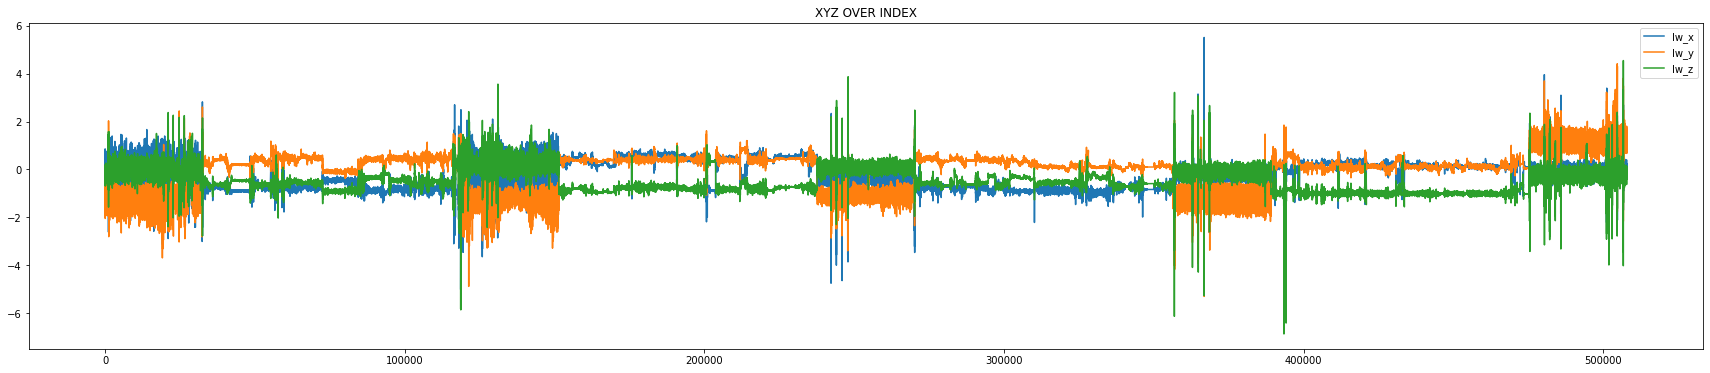

In [37]:
df.plot(y=["lw_x", "lw_y", "lw_z"], use_index=True,
        figsize=(30, 6), title="XYZ OVER INDEX")

In [38]:
df['time_diff'] = df['Unnamed: 0'].diff()

# Initialize the segment number
segment = 0
segments = []

# Iterate over the time_diff column to assign segment numbers
for diff in df['time_diff']:
    if diff > 1:
        segment += 1
    segments.append(segment)

# Add the segment numbers to the DataFrame
df['segment'] = segments

# Now df has an additional column 'segment' for segmenting the data

In [39]:
df['segment'].unique()

array([0, 1, 2, 3, 4])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


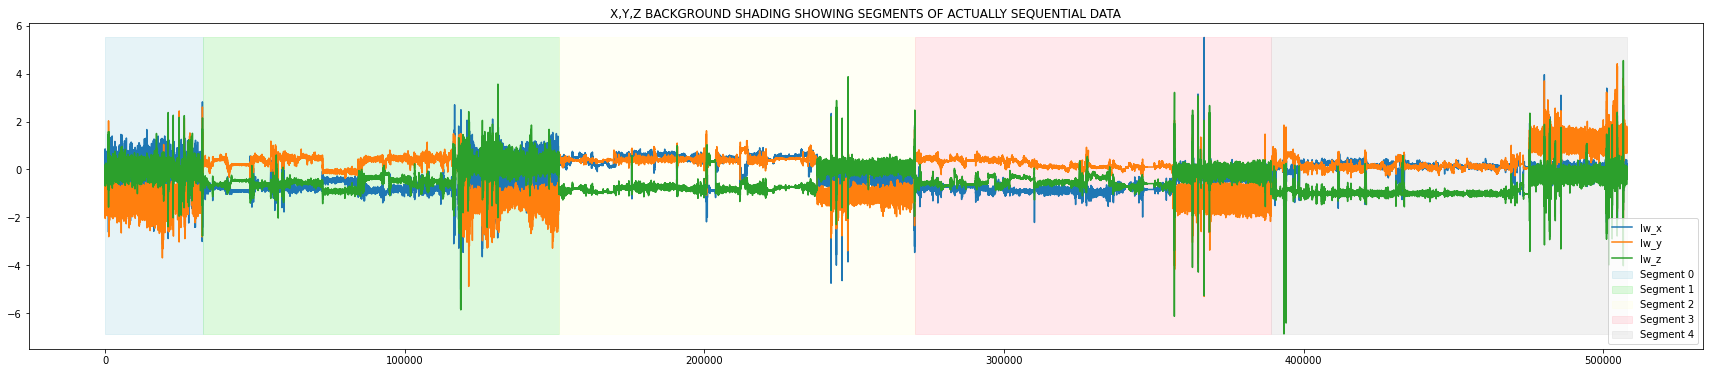

In [40]:

# Assuming df is your DataFrame and it contains 'segment' column
# Example: df = pd.read_csv('your_data.csv')

# Create a list of colors for the segments
# This is just an example palette; you can choose your own colors
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightgray']

# Create the initial plot
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['lw_x'], label='lw_x')
plt.plot(df.index, df['lw_y'], label='lw_y')
plt.plot(df.index, df['lw_z'], label='lw_z')

# Find the index ranges for each segment and assign a color
unique_segments = df['segment'].unique()
for i, segment in enumerate(unique_segments):
    segment_indices = df[df['segment'] == segment].index
    if len(segment_indices) > 0:
        color = colors[i % len(colors)]  # Cycle through colors
        plt.fill_betweenx(y=[df[['lw_x', 'lw_y', 'lw_z']].min().min(), df[['lw_x', 'lw_y', 'lw_z']].max().max()],
                          x1=segment_indices[0], x2=segment_indices[-1],
                          color=color, alpha=0.3, label=f'Segment {segment}')

plt.title("X,Y,Z BACKGROUND SHADING SHOWING SEGMENTS OF ACTUALLY SEQUENTIAL DATA")
plt.legend()
plt.show()

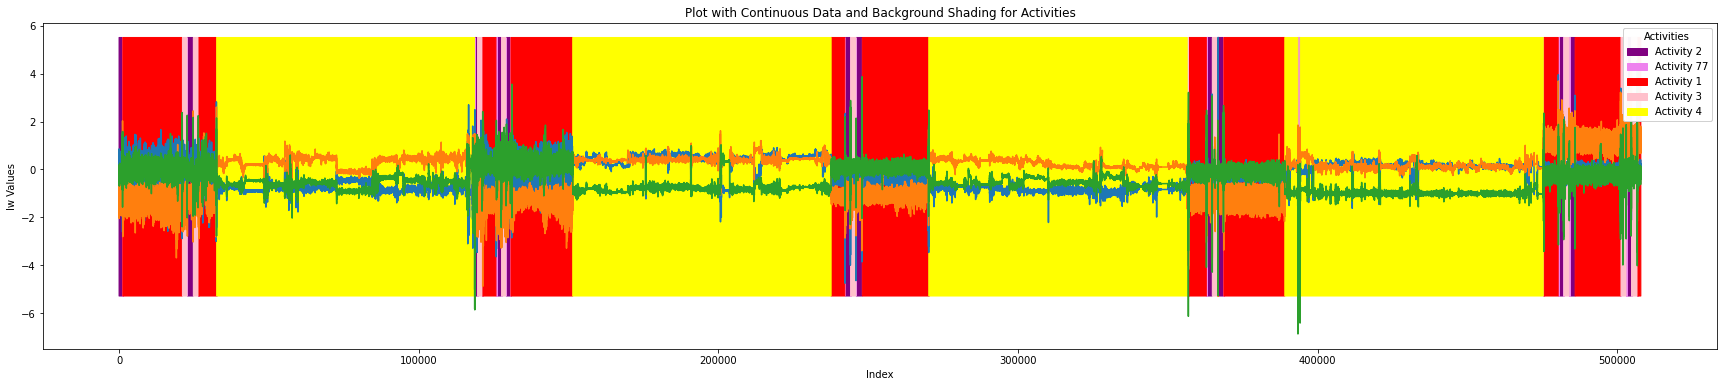

In [41]:
import matplotlib.patches as mpatches


# Assuming 'df' is your DataFrame
fig, ax = plt.subplots(figsize=(30, 6))

# Plot continuous data
ax.plot(df.index, df['lw_x'], label='lw_x')
ax.plot(df.index, df['lw_y'], label='lw_y')
ax.plot(df.index, df['lw_z'], label='lw_z')
ax.set_ylabel('lw Values')
ax.legend(loc='upper left')

# Add background shading for different activities
activities = df['activity'].unique()
colors = ['purple', 'violet', 'red',
          'pink', 'yellow']  # Customize as needed
for activity, color in zip(activities, colors):
    ax.fill_between(df.index, df['lw_x'].min(), df['lw_x'].max(),
                    where=(df['activity'] == activity), color=color, alpha=1)

# Create custom legend for activities
activity_patches = [mpatches.Patch(
    color=color, label=f'Activity {activity}') for activity, color in zip(activities, colors)]
activity_legend = plt.legend(
    handles=activity_patches, loc='upper right', title='Activities')

# Add the legend back to the plot to keep both legends
ax.add_artist(activity_legend)
plt.title("Plot with Continuous Data and Background Shading for Activities")
plt.xlabel('Index')
plt.show()

# activities:
# 2=descending stairs
# 77=clapping;
# 1=walking;
# 3=ascending stairs
# 4=driving

# DRIVING = YELLOW
# WALKING = RED

Index(['Unnamed: 0', 'activity', 'time_s', 'lw_x', 'lw_y', 'lw_z', 'time_diff',
       'segment'],
      dtype='object')


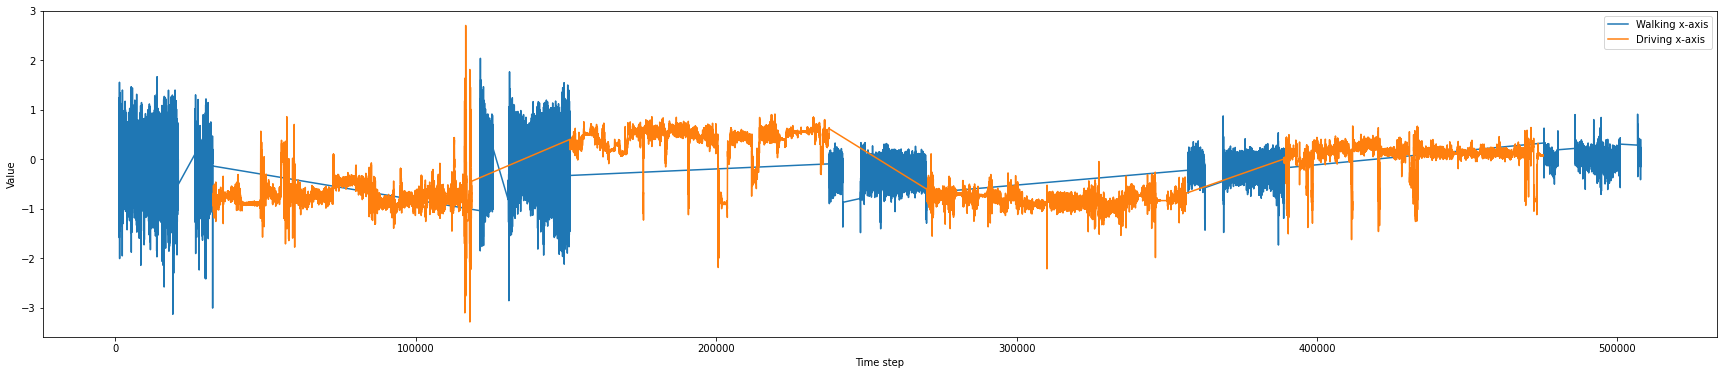

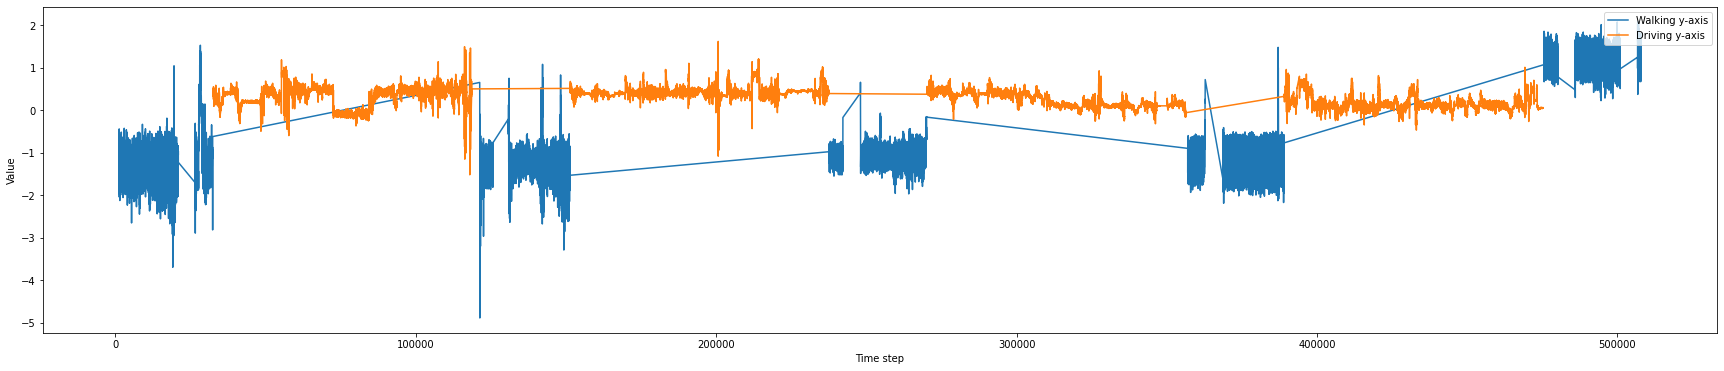

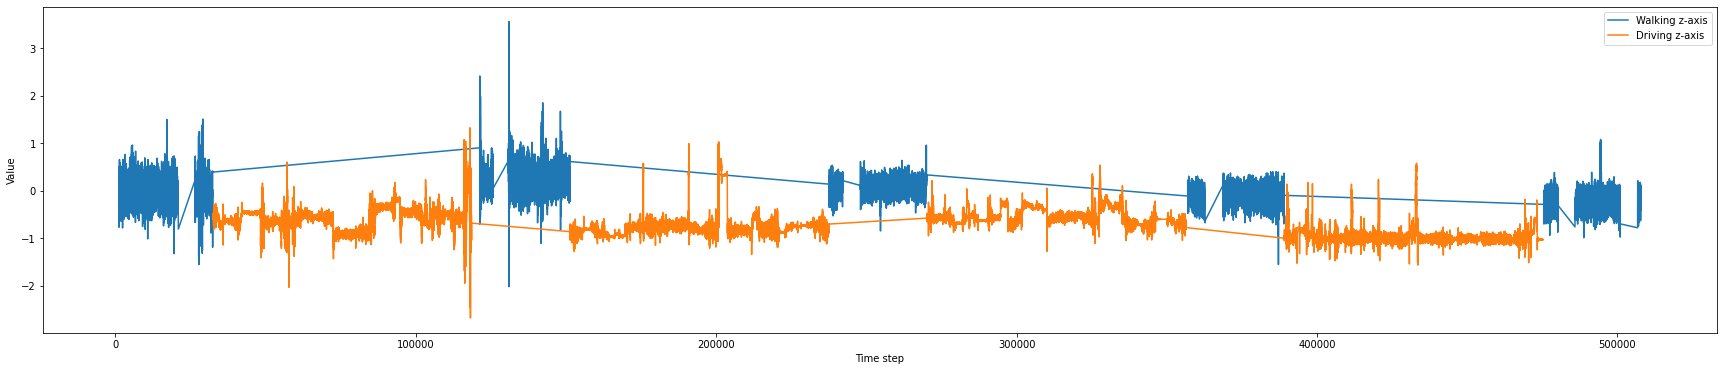

In [42]:
# from given visualiser file:


plt.figure(figsize=(30, 6))

print(df.keys())
x = df.loc[df['activity'] == 1, 'lw_x']
y = df.loc[df['activity'] == 4, 'lw_x']
plt.plot(x, label="Walking x-axis")
plt.plot(y, label="Driving x-axis")
plt.legend(loc="upper right")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(30, 6))

x = df.loc[df['activity'] == 1, 'lw_y']
y = df.loc[df['activity'] == 4, 'lw_y']
plt.plot(x, label="Walking y-axis")
plt.plot(y, label="Driving y-axis")
plt.legend(loc="upper right")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(30, 6))

x = df.loc[df['activity'] == 1, 'lw_z']
y = df.loc[df['activity'] == 4, 'lw_z']
plt.plot(x, label="Walking z-axis")
plt.plot(y, label="Driving z-axis")
plt.legend(loc="upper right")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.show()

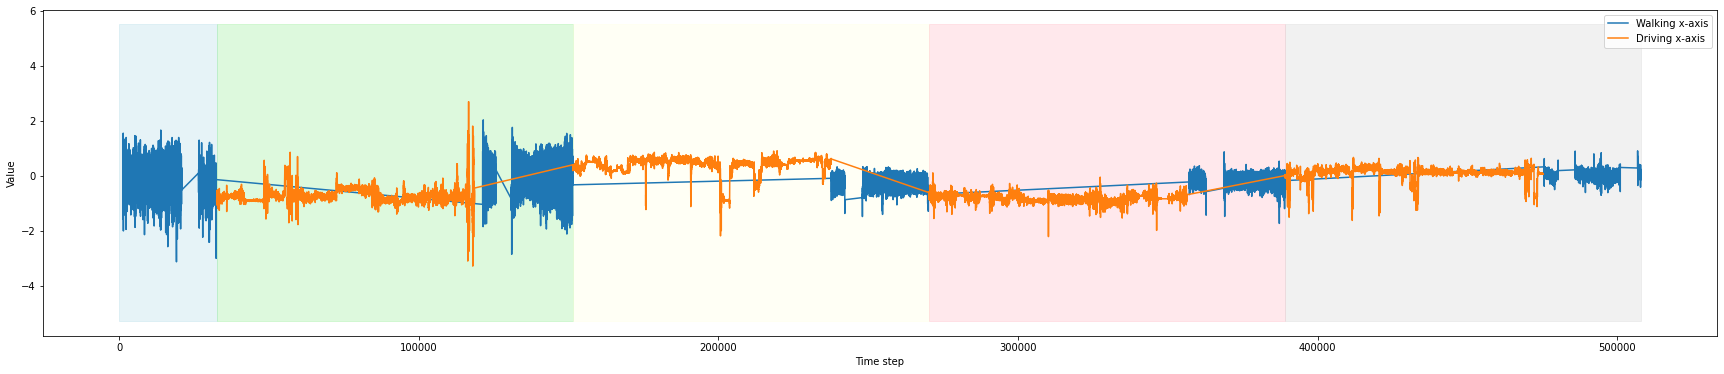

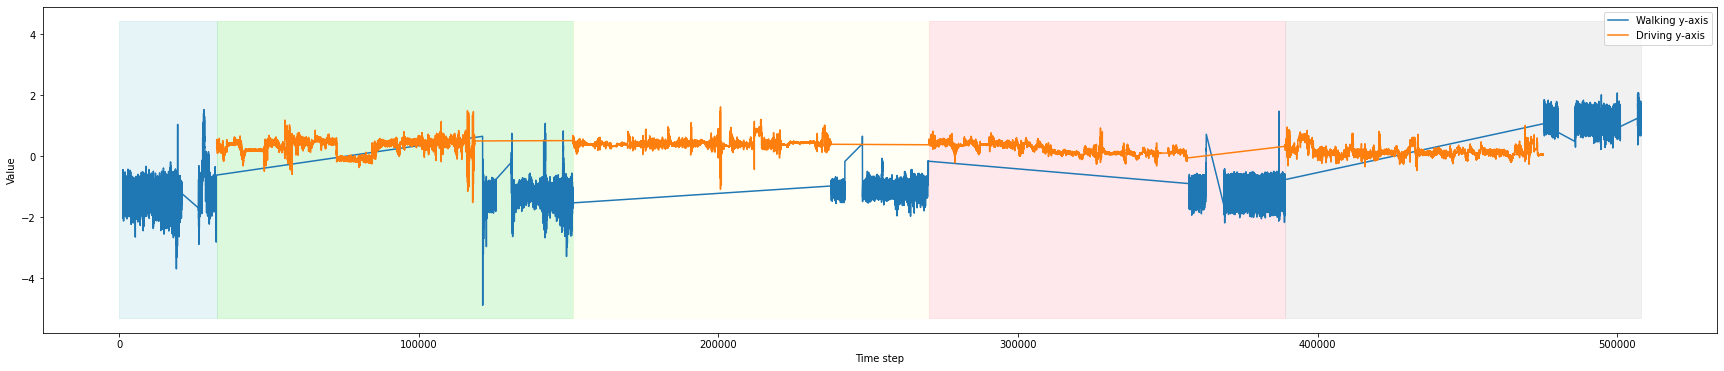

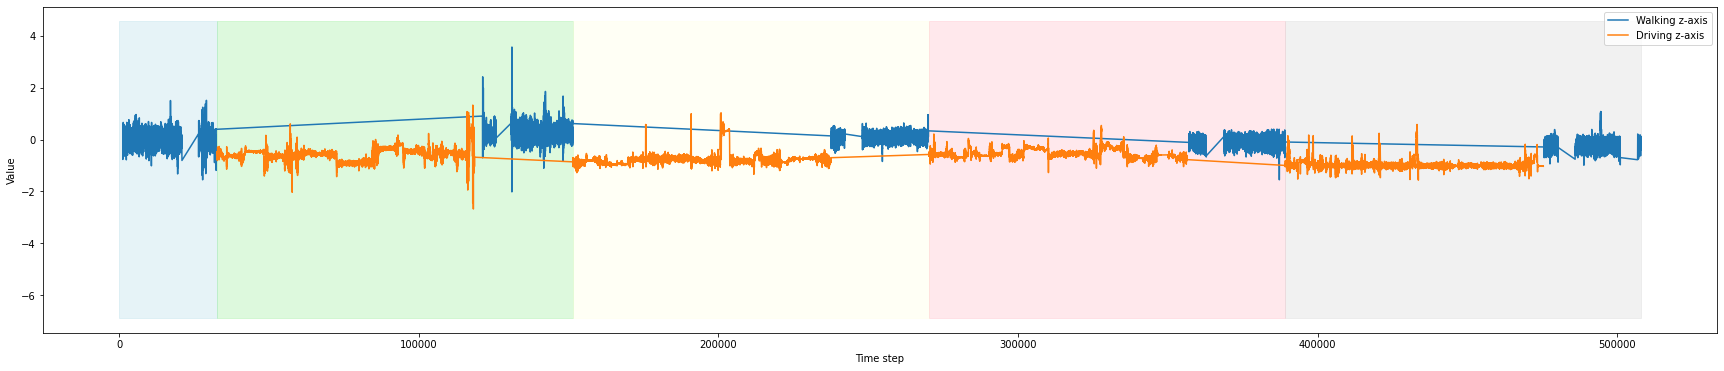

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming 'segment' is a column in your DataFrame that represents different segments
# Ensure this column exists in your DataFrame

# Create a list of colors for the segments
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightgray']

# Function to plot with segment shading


def plot_with_segments(axis, activity_1, activity_2, label_1, label_2):
    plt.figure(figsize=(30, 6))

    # Plot the data
    plt.plot(df.loc[df['activity'] == activity_1, axis], label=label_1)
    plt.plot(df.loc[df['activity'] == activity_2, axis], label=label_2)

    # Add shaded regions for segments
    unique_segments = df['segment'].unique()
    for i, segment in enumerate(unique_segments):
        segment_indices = df[df['segment'] == segment].index
        if len(segment_indices) > 0:
            color = colors[i % len(colors)]  # Cycle through colors
            plt.fill_betweenx(y=[df[axis].min(), df[axis].max()],
                              x1=segment_indices[0], x2=segment_indices[-1],
                              color=color, alpha=0.3)

    plt.legend(loc="upper right")
    plt.xlabel("Time step")
    plt.ylabel("Value")
    plt.show()


# Plot for each axis
plot_with_segments('lw_x', 1, 4, "Walking x-axis", "Driving x-axis")
plot_with_segments('lw_y', 1, 4, "Walking y-axis", "Driving y-axis")
plot_with_segments('lw_z', 1, 4, "Walking z-axis", "Driving z-axis")

In [44]:
# Filtering the DataFrame for activities 1 and 4
# filtered_df = df[df['activity'].isin([1, 4])]

# Selecting only the columns 'lw_x', 'lw_y', 'lw_z'
selected_columns_df = df[['lw_x', 'lw_y', 'lw_z']]

# Grouping by 'activity' and getting summary statistics for the selected columns
summary_by_selected_activity = selected_columns_df.groupby(
    df['activity']).describe()

# This will print the summary statistics
print(summary_by_selected_activity)

              lw_x                                                         \
             count      mean       std    min    25%    50%    75%    max   
activity                                                                    
1         124398.0 -0.097929  0.362294 -3.133 -0.266 -0.055  0.090  2.039   
2          17681.0 -0.125671  0.389747 -2.734 -0.320 -0.074  0.098  2.203   
3          14747.0 -0.110652  0.447066 -2.469 -0.246 -0.031  0.113  2.059   
4         343868.0 -0.261535  0.565142 -3.289 -0.797 -0.441  0.234  2.703   
77          7133.0 -0.187210  0.832005 -5.289 -0.707 -0.145  0.363  5.516   

              lw_y            ...                    lw_z                      \
             count      mean  ...    75%    max     count      mean       std   
activity                      ...                                               
1         124398.0 -0.775183  ... -0.711  2.086  124398.0  0.017579  0.273413   
2          17681.0 -0.431504  ...  0.387  3.344   17681.0 -

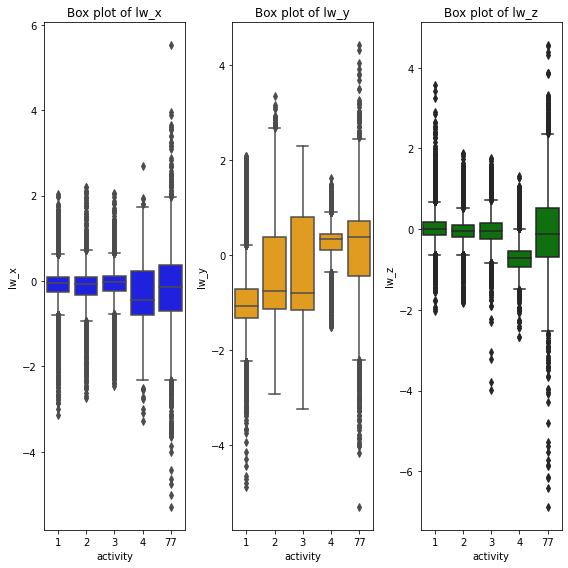

In [45]:

plt.figure(figsize=(8, 8))

# Colors for each plot
colors = {'lw_x': 'blue', 'lw_y': 'orange', 'lw_z': 'green'}

# Creating a box plot for each of the columns with specified colors
for i, column in enumerate(['lw_x', 'lw_y', 'lw_z'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='activity', y=column, data=df, color=colors[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()